In [1]:
!pip install ipyplot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 21.7 MB/s eta 0:00:00


In [2]:
import imageio
import imgaug as ia
import imgaug.augmenters as iaa
import ipyplot
from imgaug.augmentables.bbs import BoundingBox, BoundingBoxesOnImage



        WARNING! Google Colab Environment detected!
        You might encounter issues while running in Google Colab environment.
        If images are not displaying properly please try setting `force_b64` param to `True`.
        


In [3]:
from google.colab import files
files.upload()

Saving IMG 3.jpg to IMG 3.jpg


{'IMG 3.jpg': b'RIFF\x02\x94\x00\x00WEBPVP8L\xf6\x93\x00\x00/C\xc3?\x11\xff\x07$\x84\xff\xe7\xd5\x88\tH\xdcs\x14\xb7m\xe3\xd8\xfb\xcf\x9d\xde\xee~\x111\x01\xf8\xd1\x0c\x11CH\x87\xc5\xd2U@\x0c^\xb0?\x00\x00\xd4\xa8\xd1\xfeo&\xc9\xfa\x02\x8b;\x14\xabB[\xea\xa5\xee\xee\xee\xee\xee\xee\xeeWwwww7\xdaB\x85\nP\xdcmY\x97d\xe6\x8f\xca\xdds\x07C6\xfdHD\xff\'\x80q\xdb6\x92v\xb6\xff\xca\xe7\xb2\xc1\xf9D\xf4?\x00?\r\x7fN\xd1"\x89Lag\xafrrq\xf3\xf0\xf2\xf1+\x15T\xa6b\xcd\x86\xad\xba\xf4\x1d6n\xfa\x82\x95\x1bw\x1d8r\xe2\xcc\xf9K\xd7n\xdd{\xf8\xe4\xe5\xdb\xe8\xf7\x9f\xe2\x92S\xd2\xb2\x0b\n\xff\xbb\xea\xbc\xec\xb4\xc4\xd8/\x1f\xa3#\x9f=\xbaw\xfb\xc6\xe53\xc7\x0e\xec\xdc\xb4f\xc9\xdc\xe9\x13F\x0e\xea\xd5\xa9e\x83\x1aa\xc1\xfe~\xbe>^\x9e\xee\xae\xce\x8e\x0ev\n\x99D\xc4P\xf0\xe7@\xb8\x0c\xc5\x0e\x9e\x81\x15\xaa\xd7o\xd1\xb1\xf7\x90\xb1\xd3\xe6/_\xbfe\xe7\xbe\x83GO\x9d\xbbt\xfd\xf6\xfd\xc7\xcf#\xa3\xde\x7f\xfc\xfc\xe5[\\|BRrJzfvvN\xbeF\xa3\xd5\x9b\xfe\xcbF\xbdV\x9d\x9f\x97\x93\x9d\x91\x9a\x9c\x94\xf0=\xeeK

<ipython-input-7-29089eb41fd5>:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  input_img = imageio.imread('/content/download.jpeg')



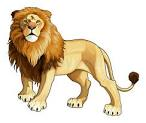
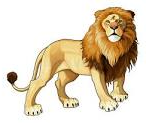
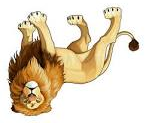


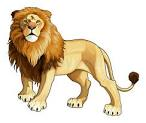
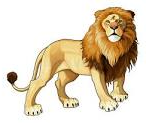
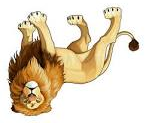


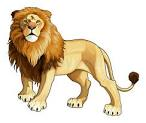
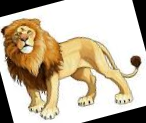


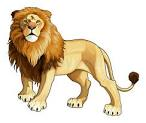
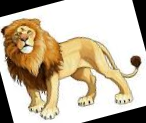


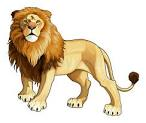
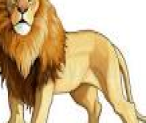


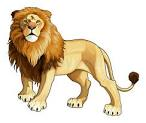
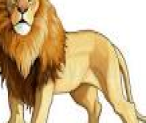

In [ ]:
input_img = imageio.imread('/content/download.jpeg')

# Horizontal Flip
hflip = iaa.Fliplr(p=1.0)
input_hf = hflip.augment_image(input_img)

# Vertical Flip
vflip = iaa.Flipud(p=1.0)
input_vf = vflip.augment_image(input_img)

images_list = [input_img, input_hf, input_vf]
labels = ['Original', 'Horizontally flipped', 'Vertically flipped']
ipyplot.plot_images(images_list, labels=labels, img_width=180)

# Rotation
rot1 = iaa.Affine(rotate=(-50, 20))
input_rot1 = rot1.augment_image(input_img)
images_list = [input_img, input_rot1]
labels = ['Original', 'Rotated Image']
ipyplot.plot_images(images_list, labels=labels, img_width=180)

# Crop
crop1 = iaa.Crop(percent=(0, 0.3))
input_crop1 = crop1.augment_image(input_img)
images_list = [input_img, input_crop1]
labels = ['Original', 'Cropped Image']
ipyplot.plot_images(images_list, labels=labels, img_width=180)


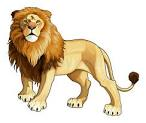
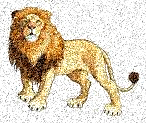


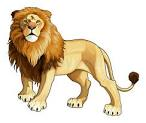
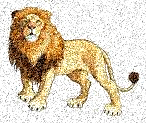


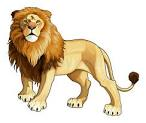
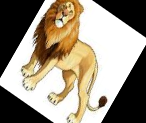


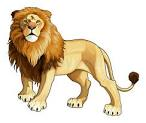
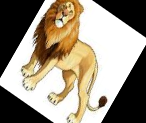


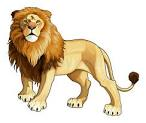
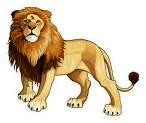
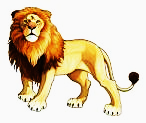
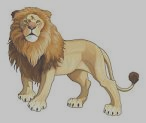


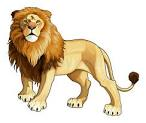
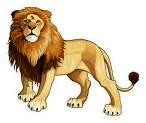
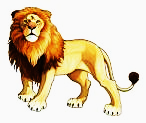
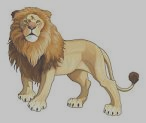

/usr/local/lib/python3.10/dist-packages/ipyplot/_utils.py:97: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.asarray(seq)



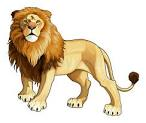
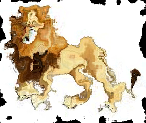
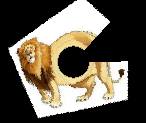
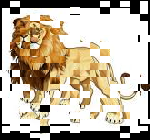


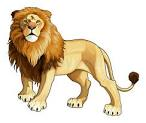
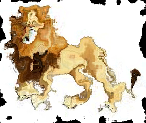
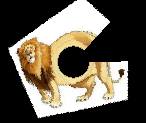
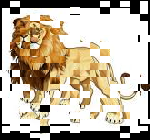

In [ ]:
# Gaussian Noise
noise = iaa.AdditiveGaussianNoise(10, 40)
input_noise = noise.augment_image(input_img)
images_list = [input_img, input_noise]
labels = ['Original', 'Gaussian Noise Image']
ipyplot.plot_images(images_list, labels=labels, img_width=180)

# Shearing
shear = iaa.Affine(shear=(-50, 50))
input_shear = shear.augment_image(input_img)
images_list = [input_img, input_shear]
labels = ['Original', 'Image Shearing']
ipyplot.plot_images(images_list, labels=labels, img_width=180)

# Contrast
contrast = iaa.GammaContrast((0.5, 2.0))
contrast_sig = iaa.SigmoidContrast(gain=(5, 10), cutoff=(0.4, 0.6))
contrast_lin = iaa.LinearContrast((0.6, 0.4))
input_contrast = contrast.augment_image(input_img)
sigmoid_contrast = contrast_sig.augment_image(input_img)
linear_contrast = contrast_lin.augment_image(input_img)
images_list = [input_img, input_contrast, sigmoid_contrast, linear_contrast]
labels = ['Original', 'Gamma Contrast', 'SigmoidContrast', 'LinearContrast']
ipyplot.plot_images(images_list, labels=labels, img_width=180)

# Complex Transformations
elastic = iaa.ElasticTransformation(alpha=60.0, sigma=4.0)
polar = iaa.WithPolarWarping(iaa.CropAndPad(percent=(-0.2, 0.7)))
jigsaw = iaa.Jigsaw(nb_rows=20, nb_cols=15, max_steps=(3, 7))
input_elastic = elastic.augment_image(input_img)
input_polar = polar.augment_image(input_img)
input_jigsaw = jigsaw.augment_image(input_img)
images_list = [input_img, input_elastic, input_polar, input_jigsaw]
labels = ['Original', 'elastic', 'polar', 'jigsaw']
ipyplot.plot_images(images_list, labels=labels, img_width=180)

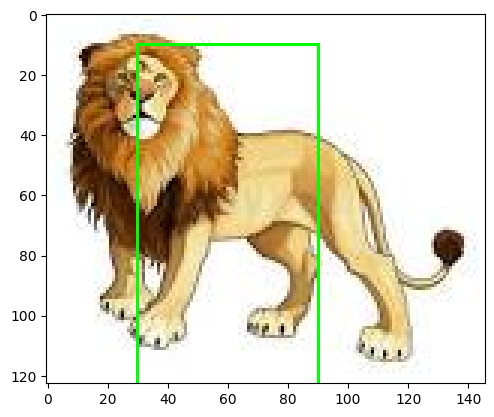

In [ ]:
import matplotlib.pyplot as plt
# Bounding Box
bbs = BoundingBoxesOnImage([BoundingBox(x1=30, x2=90, y1=10, y2=130)], shape=input_img.shape)
plt.imshow(bbs.draw_on_image(input_img))

B

In [ ]:
import imageio
import imgaug as ia
import imgaug.augmenters as iaa
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adadelta
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
batch_size = 64
num_classes = 2
epochs = 10
img_rows, img_cols = 28, 28

(x_train, y_train), (x_test, y_test) = mnist.load_data()

train_picks = np.ravel(np.logical_or(y_train == 3, y_train == 5))
test_picks = np.ravel(np.logical_or(y_test == 3, y_test == 5))
y_train_filtered = np.array(y_train[train_picks] == 5, dtype=int)
y_test_filtered = np.array(y_test[test_picks] == 5, dtype=int)
x_train_filtered = x_train[train_picks]
x_test_filtered = x_test[test_picks]

if K.image_data_format() == 'channels_first':
    x_train_filtered = x_train_filtered.reshape(x_train_filtered.shape[0], 1, img_rows, img_cols)
    x_test_filtered = x_test_filtered.reshape(x_test_filtered.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train_filtered = x_train_filtered.reshape(x_train_filtered.shape[0], img_rows, img_cols, 1)
    x_test_filtered = x_test_filtered.reshape(x_test_filtered.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)


In [ ]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from keras.optimizers import Adadelta
from keras.datasets import mnist

# Load the MNIST data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Define positive and negative classes
positive_class = 0  # Digit 0
negative_class = 1  # Digit 1

# Filter data for binary classification
train_filter = np.isin(y_train, [positive_class, negative_class])
test_filter = np.isin(y_test, [positive_class, negative_class])

x_train, y_train = x_train[train_filter], y_train[train_filter]
x_test, y_test = x_test[test_filter], y_test[test_filter]

# Assuming you have defined input_shape
input_shape = (28, 28, 1)  # Adjust this based on your data

# Preprocess the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Add channel dimension to the images
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# Convert labels to binary format
y_train_binary = (y_train == positive_class).astype(int)
y_test_binary = (y_test == positive_class).astype(int)

# Build the model
model = Sequential()
model.add(Conv2D(4, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(8, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))  # Binary classification output

model.compile(loss='binary_crossentropy',
              optimizer=Adadelta(),
              metrics=['accuracy'])

# Set up data augmentation
augmentation = True

if augmentation:
    datagen = ImageDataGenerator(
        rotation_range=90,
        width_shift_range=0.20,
        height_shift_range=0.20,
        shear_range=0,
        zoom_range=0,
        featurewise_center=False,
        featurewise_std_normalization=False,
        zca_whitening=False,
        horizontal_flip=True,
        vertical_flip=True,
        fill_mode='nearest',
    )

    # Make sure that x_train and y_train_binary have the same number of samples
    assert len(x_train) == len(y_train_binary)

    print("Running augmented training now, with augmentation")
    history = model.fit(datagen.flow(x_train, y_train_binary, batch_size=32),
                        steps_per_epoch=len(x_train) // 32,
                        epochs=10,
                        validation_data=(x_test, y_test_binary))
else:
    print("Running regular training, no augmentation")
    history = model.fit(x_train, y_train_binary,
                        batch_size=32,
                        epochs=10,
                        verbose=1,
                        validation_data=(x_test, y_test_binary))


Running augmented training now, with augmentation
Epoch 1/10
395/395 [==============================] - 13s 30ms/step - loss: 0.6920 - accuracy: 0.5175 - val_loss: 0.6771 - val_accuracy: 0.6374
Epoch 2/10
395/395 [==============================] - 10s 25ms/step - loss: 0.6903 - accuracy: 0.5237 - val_loss: 0.6752 - val_accuracy: 0.6827
Epoch 3/10
395/395 [==============================] - 12s 29ms/step - loss: 0.6898 - accuracy: 0.5304 - val_loss: 0.6734 - val_accuracy: 0.7210
Epoch 4/10
395/395 [==============================] - 9s 24ms/step - loss: 0.6878 - accuracy: 0.5363 - val_loss: 0.6715 - val_accuracy: 0.7579
Epoch 5/10
395/395 [==============================] - 10s 26ms/step - loss: 0.6861 - accuracy: 0.5401 - val_loss: 0.6696 - val_accuracy: 0.7939
Epoch 6/10
395/395 [==============================] - 12s 29ms/step - loss: 0.6859 - accuracy: 0.5412 - val_loss: 0.6677 - val_accuracy: 0.8180
Epoch 7/10
395/395 [==============================] - 13s 32ms/step - loss: 0.6842 - ac

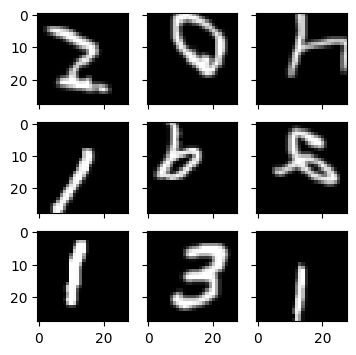

In [ ]:
import os
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator

# Load MNIST data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Reshape and normalize data
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_train = X_train.astype('float32')

# Data augmentation
datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True, width_shift_range=0.2, height_shift_range=0.2)

# Create the directory if it doesn't exist
save_to_dir = '/content/images1'
os.makedirs(save_to_dir, exist_ok=True)

# Generate and save only 10 augmented images
batch_size = 9
steps_per_epoch = 10 // batch_size  # Set the number of batches to generate
for i, (X_batch, y_batch) in enumerate(datagen.flow(X_train, y_train, batch_size=batch_size, shuffle=False,
                                                    save_to_dir=save_to_dir, save_prefix='aug', save_format='png')):
    if i >= steps_per_epoch - 1:
        break

# Display a summary plot
fig, ax = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(4, 4))
for i in range(3):
    for j in range(3):
        ax[i][j].imshow(X_batch[i * 3 + j].reshape(28, 28), cmap=plt.get_cmap("gray"))

plt.show()
